In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.special import factorial
import time

In [20]:
# Réglages recuit simulé
temp = 20 # Température initiale puis courante (décroit au cours de l'algorithme)
temp_gel = 0.005  # Température de gel (fixe); critère d'arrêt
alpha = 0.99  # Taux de décroissance (géométrique)
k_equil = 100  # Nombre d'itérations sur un palier de température

In [21]:
# Problème Voyageur de commerce; Définition des villes et paramétrages
N = 50  # Nombre de villes
np.random.seed(10)  # Graine pour reproductibilité

In [22]:
# Typologie des cities (cercle ou carré)
cercle = False  # Disposées sur un cercle si True, sinon aléatoire sur un carré

In [23]:
if cercle:
    rad = np.random.rand(N) * 2 * np.pi
    xpos = np.cos(rad)
    ypos = np.sin(rad)
else:
    xpos = np.random.rand(N)
    ypos = np.random.rand(N)

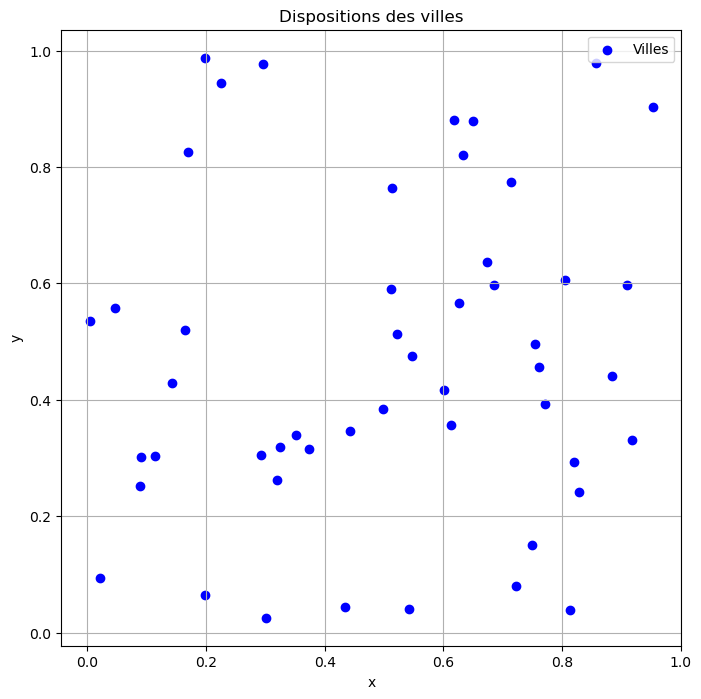

In [24]:
# Affichage des villes
plt.figure(figsize=(8, 8))
plt.scatter(xpos, ypos, c='blue', label='Villes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispositions des villes')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Initialisation du parcours
current_path = np.arange(N)  # Parcours initial (ordre naturel des villes)
np.random.shuffle(current_path)  # Mélange aléatoire

In [26]:
# Calcul de la distance totale d'un parcours
def total_distance(path, xpos, ypos):
    dist = 0
    for i in range(len(path)):
        x1, y1 = xpos[path[i]], ypos[path[i]]
        x2, y2 = xpos[path[(i + 1) % len(path)]], ypos[path[(i + 1) % len(path)]]
        dist += np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

current_distance = total_distance(current_path, xpos, ypos)
print(f"Distance initiale: {current_distance:.2f}")

Distance initiale: 23.45


In [27]:
def voisin(cycle, n):
    """
    Cette fonction définit le voisinage pour un cycle donné en utilisant une mutation de type 2-opt.
    
    Parameters:
        cycle (list or array): Le cycle actuel (parcours des villes).
        n (int): Nombre total de villes.
    
    Returns:
        list: Le cycle modifié (voisin).
    """
    ip = np.random.randint(1, n + 1)  # Indice aléatoire entre 1 et n inclus
    jp = np.random.randint(1, n + 1)  # Indice aléatoire entre 1 et n inclus

    mx = max(ip, jp)
    mn = min(ip, jp)

    # Création du voisin
    cc = cycle.copy()
    cc[mn-1:mx] = cc[mn-1:mx][::-1]  # Inversion des éléments entre mn et mx (Python utilise des indices 0-based)

    return cc


In [28]:
def greedy_path(xpos, ypos):
    N = len(xpos)
    visited = [False] * N
    path = [0]  # Commencer par la première ville
    visited[0] = True

    for _ in range(N - 1):
        last = path[-1]
        min_dist = float('inf')
        next_city = -1

        for city in range(N):
            if not visited[city]:
                dist = np.sqrt((xpos[last] - xpos[city])**2 + (ypos[last] - ypos[city])**2)
                if dist < min_dist:
                    min_dist = dist
                    next_city = city

        path.append(next_city)
        visited[next_city] = True
    
    return path

In [29]:
# def trouver_chemin_plus_court(xpos, ypos):
#     """
#     Trouve le chemin le plus court en énumérant toutes les permutations.

#     Parameters:
#         xpos (list): Liste des coordonnées x des villes.
#         ypos (list): Liste des coordonnées y des villes.

#     Returns:
#         tuple: Le chemin le plus court et sa distance totale.
#     """
#     n = len(xpos)  # Nombre de villes
#     villes = list(range(n))  # Indices des villes
#     chemins_possibles = permutations(villes)  # Toutes les permutations des villes

#     chemin_min = None
#     distance_min = float('inf')

#     # Parcourir tous les chemins possibles
#     for chemin in chemins_possibles:
#         distance_actuelle = total_distance(chemin, xpos, ypos)
#         if distance_actuelle < distance_min:
#             distance_min = distance_actuelle
#             chemin_min = chemin

#     return chemin_min, distance_min
    
# chemin_plus_court, distance_plus_courte = trouver_chemin_plus_court(xpos, ypos)
# print(f"Le chemin le plus court est : {chemin_plus_court}")
# print(f"La distance totale du chemin est : {distance_plus_courte:.2f}")


In [30]:
# Implémentation de l'algorithme de recuit simulé
L_dist = []
L_temp = []
L_iter=[]
iterations = 0
while temp > temp_gel:
    iterations+=1
    L_iter.append(iterations)
    L_temp.append(temp)
    for _ in range(k_equil):
        
        # Générer un voisin (échange de deux villes aléatoires)

        #Méthode naive
        # new_path = current_path.copy()
        # i, j = np.random.choice(N, size=2, replace=False)
        # new_path[i], new_path[j] = new_path[j], new_path[i]
        
        #Methode 2-opt
        new_path = voisin(current_path, N)

        # Calculer la distance du nouveau parcours
        new_distance = total_distance(new_path, xpos, ypos)

        # Décider d'accepter le nouveau parcours
        delta_dist = new_distance - current_distance
        taux = min(1,np.exp(-(delta_dist) / temp))
        if new_distance < current_distance or np.random.rand() <taux:
            current_path = new_path
            current_distance = new_distance
    L_dist.append(current_distance)
    # Réduire la température
    temp *= alpha
    print(f"Température: {temp:.2f}, Distance actuelle: {current_distance:.2f}")

Température: 19.80, Distance actuelle: 23.67
Température: 19.60, Distance actuelle: 24.28
Température: 19.41, Distance actuelle: 25.94
Température: 19.21, Distance actuelle: 26.20
Température: 19.02, Distance actuelle: 25.33
Température: 18.83, Distance actuelle: 24.63
Température: 18.64, Distance actuelle: 25.95
Température: 18.45, Distance actuelle: 24.65
Température: 18.27, Distance actuelle: 22.68
Température: 18.09, Distance actuelle: 22.48
Température: 17.91, Distance actuelle: 26.31
Température: 17.73, Distance actuelle: 25.62
Température: 17.55, Distance actuelle: 22.98
Température: 17.37, Distance actuelle: 25.77
Température: 17.20, Distance actuelle: 24.66
Température: 17.03, Distance actuelle: 24.55
Température: 16.86, Distance actuelle: 24.29
Température: 16.69, Distance actuelle: 25.43
Température: 16.52, Distance actuelle: 22.76
Température: 16.36, Distance actuelle: 26.14
Température: 16.19, Distance actuelle: 24.74
Température: 16.03, Distance actuelle: 24.06
Températur

Distance recuit = 5.7926707742949315


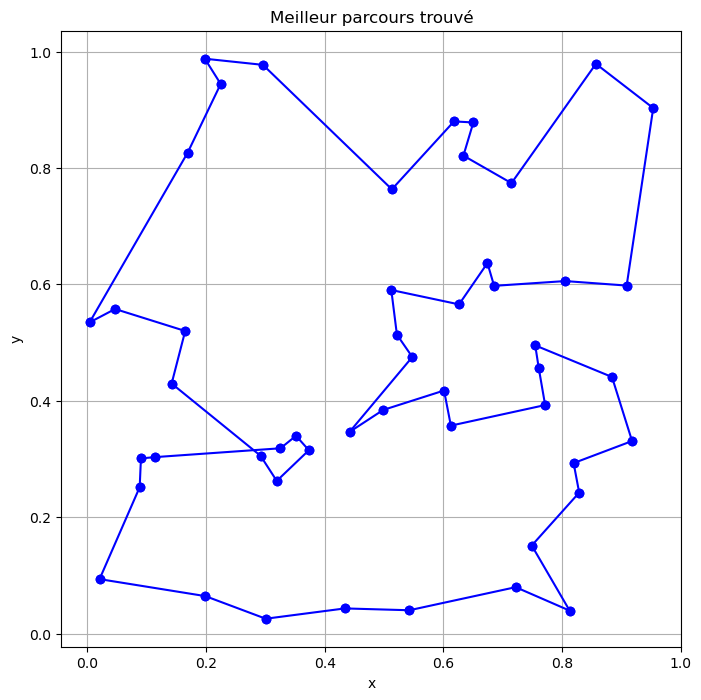

In [31]:
# Affichage du meilleur parcours trouvé
print(rf"Distance recuit = {total_distance(current_path, xpos, ypos)}")
plt.figure(figsize=(8, 8))
for i in range(N):
    x1, y1 = xpos[current_path[i]], ypos[current_path[i]]
    x2, y2 = xpos[current_path[(i + 1) % N]], ypos[current_path[(i + 1) % N]]
    plt.plot([x1, x2], [y1, y2], 'bo-')
plt.title('Meilleur parcours trouvé')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

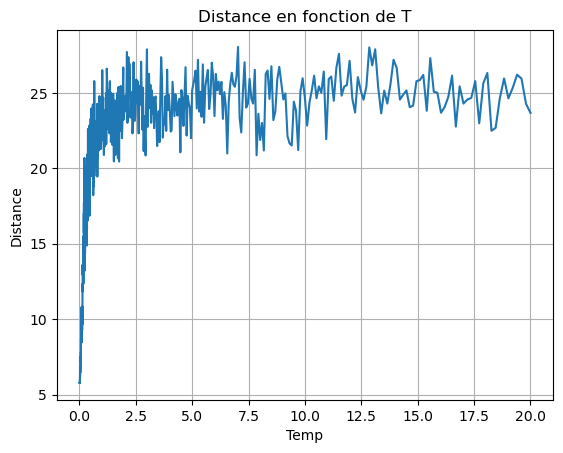

In [32]:
plt.plot(L_temp, L_dist)
plt.title('Distance en fonction de T')
plt.xlabel('Temp')
plt.ylabel('Distance')
plt.grid()
plt.show()

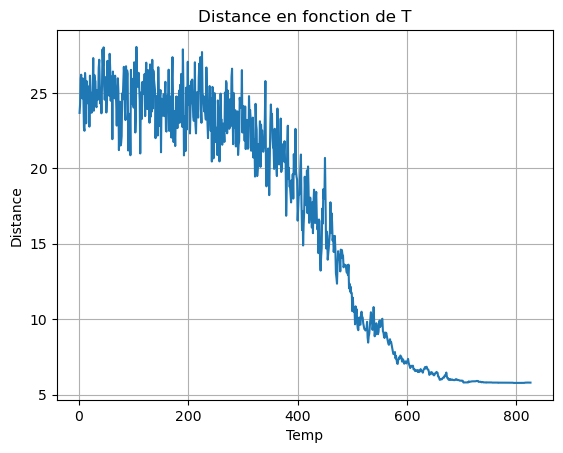

In [33]:
plt.plot(L_iter, L_dist)
plt.title('Distance en fonction de T')
plt.xlabel('Temp')
plt.ylabel('Distance')
plt.grid()
plt.show()

Distance algo glouton = 6.395955435651967


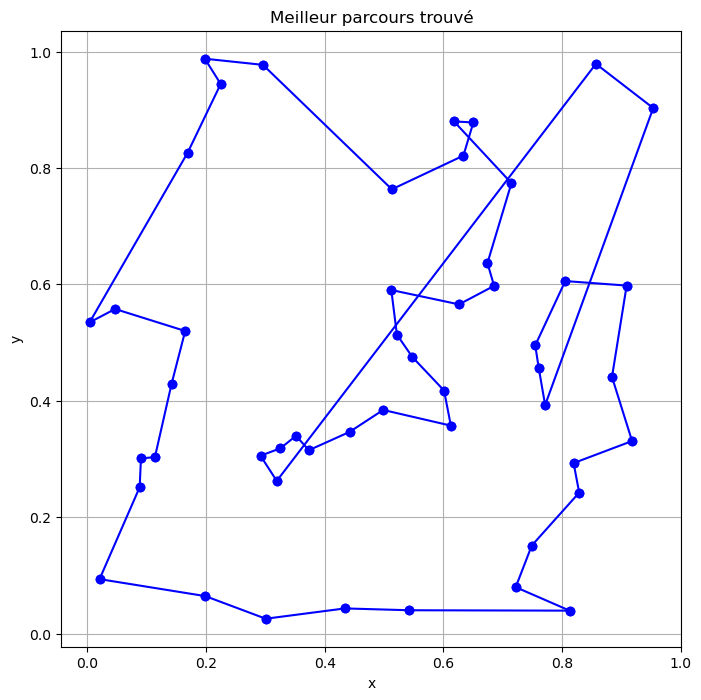

In [34]:
# Affichage du parcours greedy
Greedy_path = greedy_path(xpos, ypos)
print(rf"Distance algo glouton = {total_distance(Greedy_path, xpos, ypos)}")
plt.figure(figsize=(8, 8))
for i in range(N):
    x1, y1 = xpos[Greedy_path[i]], ypos[Greedy_path[i]]
    x2, y2 = xpos[Greedy_path[(i + 1) % N]], ypos[Greedy_path[(i + 1) % N]]
    plt.plot([x1, x2], [y1, y2], 'bo-')
plt.title('Meilleur parcours trouvé')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Coût CPU

In [45]:
import time 
from itertools import permutations
from  scipy.special import factorial
import numpy as np 
# Définir un ensemble fictif de villes
cities = list(range(7))  
# Mesurer le temps pour générer 100 permutations
time_cpu_per_100 = 0 
# Temps écoulé pour 100 cycles
for k in range (1000): 
    start_time = time.perf_counter()
    list(permutations(cities, len(cities)))
    end_time = time.perf_counter()
    time_cpu_per_100 += (end_time - start_time)/factorial(7)

def convert_to_billion_years(seconds):
    years = seconds / (60 * 60 * 24 * 365.25)  
    billion_years = years / 1e9                
    return f"{billion_years:.2e} billion years"


# Âge de l'univers en secondes (environ 13.8 milliards d'années)
age_univers = 13.8 * 10**9 * 365.25 * 24 * 60 * 60  # en secondes
nb_ville = np.linspace(1, 100, 99).astype(int)
cout_temp = (factorial(nb_ville-1)//2) * time_cpu_per_100/100
depassement = cout_temp > age_univers
first_depassement = np.argmax(depassement==True)

print(
    f"time for 100 Hamiltonian Cycle : {time_cpu_per_100:.2}\n"
    f"time for 5 cities : {convert_to_billion_years(cout_temp[5])}\n"
    f"time for 10 cities :{convert_to_billion_years(cout_temp[10])}\n"
    f"time for 20 cities : {convert_to_billion_years(cout_temp[20])}\n"
    f"time for 50 cities :  {convert_to_billion_years(cout_temp[50])}\n"
    f"Value preceding the first overrun for n_city = {first_depassement - 1}, "
    f"time = {convert_to_billion_years(cout_temp[first_depassement - 1])}\n"
    f"First overrun for n_city = {first_depassement}, "
    f"time = {convert_to_billion_years(cout_temp[first_depassement])}"
)


time for 100 Hamiltonian Cycle : 0.00014
time for 5 cities : 2.65e-21 billion years
time for 10 cities :8.01e-17 billion years
time for 20 cities : 5.37e-05 billion years
time for 50 cities :  6.71e+41 billion years
Value preceding the first overrun for n_city = 24, time = 1.37e+01 billion years
First overrun for n_city = 25, time = 3.42e+02 billion years
